1. output: 'mapping_PDalpha.txt'(mapping file with PD alpha diversity)
2. scatterplots of PD alpha diversity vs. 5 vitaminD measurements (output: 'vitamin_pd.txt' (5 VitD variables with PD)
3. linear regression of PD alpha diversity vs. 5 vitaminD measurements & diagnostic plots and tests
4. effect size analysis of alpha diversity with medata (see notebook R_alpha_RDA)

reference on statsmodel ols and disagnostic plots
http://mpastell.com/pweave/_downloads/linear_regression.html (visualization)
http://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html (tests)

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/serene/miniconda3/envs/Vitamin/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## I. prepare mapping_PDalpha file

### calculate average PD alpha diversity at highest rarefaction 5870

In [3]:
alpha = pd.read_csv('../data/shannon.txt', sep='\t')

In [4]:
alpha.tail(10)

,Unnamed: 0,sequences per sample,iteration,SD8637,PO7016,MN1789,MN1868,PA3814,MN2006,PA3070,...,PI4544,BI0445,PO7138,BI0215,MN2452,BI0704,PO7442,MN2439,SD8458,PI4831
100,alpha_rarefaction_5870_0.txt,5870,0,5.358064,4.623535,5.672357,5.344327,5.956702,5.754210,4.461627,...,5.229101,2.786864,5.295023,5.243861,5.351673,5.653516,4.532820,4.280612,5.384543,3.760593
101,alpha_rarefaction_5870_1.txt,5870,1,5.373735,4.664897,5.575679,5.371486,5.987728,5.772647,4.478166,...,5.235149,2.709682,5.178727,5.225858,5.367119,5.615350,4.576044,4.304976,5.347405,3.788959
102,alpha_rarefaction_5870_2.txt,5870,2,5.288770,4.686544,5.608485,5.376532,5.939975,5.772453,4.461159,...,5.204714,2.810960,5.247735,5.229132,5.332448,5.636662,4.594560,4.230180,5.385918,3.769105
103,alpha_rarefaction_5870_3.txt,5870,3,5.344867,4.667271,5.632756,5.365440,5.931689,5.778828,4.440869,...,5.258647,2.750628,5.235630,5.198488,5.335737,5.630894,4.547876,4.229301,5.433851,3.735480
104,alpha_rarefaction_5870_4.txt,5870,4,5.342874,4.675960,5.631913,5.382005,5.952102,5.883804,4.462897,...,5.206001,2.753829,5.278896,5.232811,5.308877,5.660159,4.540313,4.246183,5.436445,3.774357
105,alpha_rarefaction_5870_5.txt,5870,5,5.362143,4.641412,5.592539,5.389160,5.962188,5.790364,4.448502,...,5.215240,2.741628,5.255677,5.233034,5.335807,5.657854,4.550065,4.272407,5.419759,3.742519
106,alpha_rarefaction_5870_6.txt,5870,6,5.346711,4.684145,5.570968,5.333318,5.971134,5.792474,4.453358,...,5.205455,2.785888,5.302992,5.267584,5.313575,5.654264,4.572185,4.275417,5.389796,3.779128
107,alpha_rarefaction_5870_7.txt,5870,7,5.334744,4.661993,5.565951,5.302840,5.968192,5.808405,4.492040,...,5.247786,2.754721,5.285498,5.233186,5.357254,5.684424,4.580145,4.248809,5.349595,3.735933
108,alpha_rarefaction_5870_8.txt,5870,8,5.329695,4.672688,5.636244,5.366249,5.980805,5.771929,4.438336,...,5.179380,2.751254,5.271003,5.179097,5.335133,5.685300,4.551880,4.249678,5.357840,3.800754
109,alpha_rarefaction_5870_9.txt,5870,9,5.371591,4.677832,5.659768,5.382941,5.979993,5.770804,4.422710,...,5.176630,2.715379,5.261200,5.255363,5.361065,5.692406,4.562925,4.263508,5.354514,3.785972


In [5]:
alpha.shape

(110, 602)

In [6]:
# look at only the highest rarefaction depth
alpha_high = alpha.loc[alpha['sequences per sample'] == 5870]

In [7]:
# take average of 10 iterations as alpha value
alpha_high = alpha_high.drop(['Unnamed: 0', 'sequences per sample', 'iteration'], axis=1)

In [8]:
alpha_high.head()

,SD8637,PO7016,MN1789,MN1868,PA3814,MN2006,PA3070,PI5374,SD8714,BI0448,...,PI4544,BI0445,PO7138,BI0215,MN2452,BI0704,PO7442,MN2439,SD8458,PI4831
100,5.358064,4.623535,5.672357,5.344327,5.956702,5.754210,4.461627,4.922432,5.221109,4.014836,...,5.229101,2.786864,5.295023,5.243861,5.351673,5.653516,4.532820,4.280612,5.384543,3.760593
101,5.373735,4.664897,5.575679,5.371486,5.987728,5.772647,4.478166,4.890101,5.194618,4.035524,...,5.235149,2.709682,5.178727,5.225858,5.367119,5.615350,4.576044,4.304976,5.347405,3.788959
102,5.288770,4.686544,5.608485,5.376532,5.939975,5.772453,4.461159,4.898988,5.167794,4.021510,...,5.204714,2.810960,5.247735,5.229132,5.332448,5.636662,4.594560,4.230180,5.385918,3.769105
103,5.344867,4.667271,5.632756,5.365440,5.931689,5.778828,4.440869,4.882358,5.192064,4.030519,...,5.258647,2.750628,5.235630,5.198488,5.335737,5.630894,4.547876,4.229301,5.433851,3.735480
104,5.342874,4.675960,5.631913,5.382005,5.952102,5.883804,4.462897,4.859322,5.181945,4.064250,...,5.206001,2.753829,5.278896,5.232811,5.308877,5.660159,4.540313,4.246183,5.436445,3.774357


In [9]:
alpha_high.shape

(10, 599)

In [10]:
alpha_avg = pd.DataFrame(alpha_high.mean(axis=0), columns=['alpha_shannon'])

### Add PD alpha diversity into mapping file

In [11]:
mf = pd.read_csv('../data/mapping_cleaned_MrOS.txt', sep='\t', dtype=str, index_col='#SampleID') 

In [12]:
mf.head()

,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,Title,...,OHV1D2,OHV1D2CT,OHVD2CT,OHVDTOT,OHV1DTOT,OHSEAS,VDstatus,Description,ratio_activation,ratio_catabolism
#SampleID,,,,,,,,,,,,,,,,,,,,,
BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,25.8,0.039299999999999995,3:SUMMER,sufficiency,Orwoll.BI0023.BI,0.0015232558139534882,0.0686046511627907
BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,39.2,0.0619,2:SPRING,sufficiency,Orwoll.BI0056.BI,0.001579081632653061,0.09974489795918368
BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,23.1,0.0521,2:SPRING,sufficiency,Orwoll.BI0131.BI,0.002255411255411255,0.06450216450216449
BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,27.3,0.0431,2:SPRING,sufficiency,Orwoll.BI0153.BI,0.0015787545787545787,0.07838827838827839
BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,33.0,0.0502,4:FALL,sufficiency,Orwoll.BI0215.BI,0.0015212121212121212,0.1096969696969697


In [13]:
table = pd.merge(mf, alpha_avg, left_index=True, right_index=True)

In [14]:
table.head()

,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,Title,...,OHV1D2CT,OHVD2CT,OHVDTOT,OHV1DTOT,OHSEAS,VDstatus,Description,ratio_activation,ratio_catabolism,alpha_shannon
BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,25.8,0.039299999999999995,3:SUMMER,sufficiency,Orwoll.BI0023.BI,0.0015232558139534882,0.0686046511627907,5.621879
BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,39.2,0.0619,2:SPRING,sufficiency,Orwoll.BI0056.BI,0.001579081632653061,0.09974489795918368,3.766687
BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,23.1,0.0521,2:SPRING,sufficiency,Orwoll.BI0131.BI,0.002255411255411255,0.06450216450216449,3.945446
BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,27.3,0.0431,2:SPRING,sufficiency,Orwoll.BI0153.BI,0.0015787545787545787,0.07838827838827839,4.801318
BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,33.0,0.0502,4:FALL,sufficiency,Orwoll.BI0215.BI,0.0015212121212121212,0.1096969696969697,5.229841


In [15]:
print(mf.shape, table.shape)

(599, 66) (599, 67)


In [17]:
# check
print(alpha_avg.head())
print(table.loc[table.index=='SD8637'].alpha_shannon)
print(table.loc[table.index=='PO7016'].alpha_shannon)
print(table.loc[table.index=='MN1789'].alpha_shannon)
print(table.loc[table.index=='MN1868'].alpha_shannon)
print(table.loc[table.index=='PA3814'].alpha_shannon)

        alpha_shannon
SD8637       5.345319
PO7016       4.665628
MN1789       5.614666
MN1868       5.361430
PA3814       5.963051
SD8637    5.345319
Name: alpha_shannon, dtype: float64
PO7016    4.665628
Name: alpha_shannon, dtype: float64
MN1789    5.614666
Name: alpha_shannon, dtype: float64
MN1868    5.36143
Name: alpha_shannon, dtype: float64
PA3814    5.963051
Name: alpha_shannon, dtype: float64


### output mapping file with PD alpha diveristy

In [18]:
table.to_csv('../data/mapping_Shannonalpha.txt', sep='\t')

## II. scatterplots of PD alpha vs. 5 vitaminD measurements

### prepare file with only 5 VitD variables and PD

In [19]:
df = table[['OHVD3', 'OHV1D3', 'OHV24D3', 'ratio_activation', 'ratio_catabolism', 'alpha_shannon']]
df = df.apply(pd.to_numeric, errors='coerce') # still need to convert, as their types changed in 'table'

In [20]:
print(df.shape)

(599, 6)


In [21]:
df.head()

,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism,alpha_shannon
BI0023,25.8,0.0393,1.77,0.001523,0.068605,5.621879
BI0056,39.2,0.0619,3.91,0.001579,0.099745,3.766687
BI0131,23.1,0.0521,1.49,0.002255,0.064502,3.945446
BI0153,27.3,0.0431,2.14,0.001579,0.078388,4.801318
BI0215,33.0,0.0502,3.62,0.001521,0.109697,5.229841


In [22]:
df.describe()

,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism,alpha_shannon
count,556.000000,567.000000,567.000000,556.000000,556.000000,599.000000
mean,35.229137,0.057775,3.430864,0.001772,0.094776,4.903917
std,12.450758,0.019773,1.834771,0.000735,0.029770,0.888095
min,7.800000,0.010700,0.300000,0.000398,0.018788,1.458999
25%,27.400000,0.044100,2.175000,0.001316,0.074216,4.383837
50%,33.650000,0.055500,3.180000,0.001660,0.092821,5.018715
75%,41.825000,0.066300,4.235000,0.002081,0.112849,5.546945
max,104.000000,0.156000,14.070000,0.006727,0.197786,6.763706


In [23]:
df.to_csv('../data/vitamin_shannon.txt', sep='\t')

### plot scatterplots separately due to different scale

In [24]:
var = df.columns.drop('alpha_shannon')

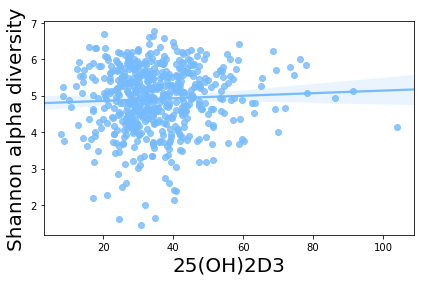

In [25]:
i = 0
col_list_palette = sns.xkcd_palette(['sky blue'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_shannon", label=var[i],data=df)
ax.set_xlabel('25(OH)2D3', fontsize=20)
ax.set_ylabel('Shannon alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/Shannon_VD3_reg.pdf')
ax.savefig('../figures/Shannon_VD3_reg.png')

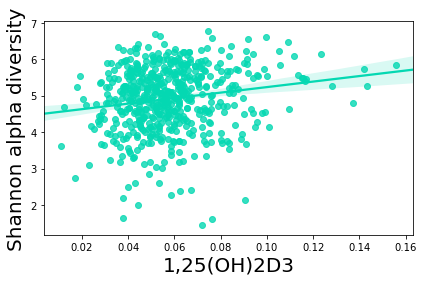

In [26]:
i = 1
col_list_palette = sns.xkcd_palette(['aquamarine'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_shannon", label=var[i],data=df)
ax.set_xlabel('1,25(OH)2D3', fontsize=20)
ax.set_ylabel('Shannon alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/Shannon_V1D3_reg.pdf')
ax.savefig('../figures/Shannon_V1D3_reg.png')

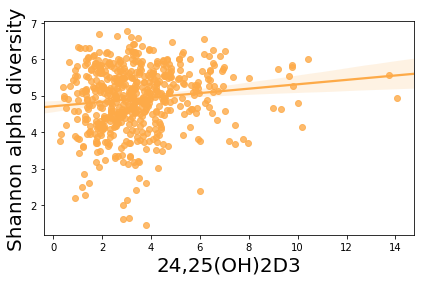

In [27]:
i = 2
col_list_palette = sns.xkcd_palette(['light orange'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_shannon", label=var[i],data=df)
ax.set_xlabel('24,25(OH)2D3', fontsize=20)
ax.set_ylabel('Shannon alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/Shannon_V24D3_reg.pdf')
ax.savefig('../figures/Shannon_V24D3_reg.png')

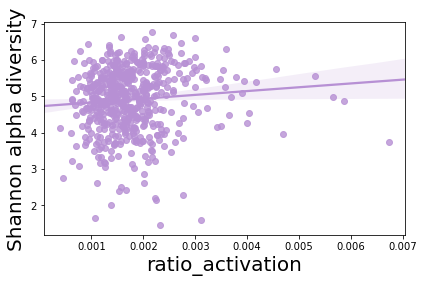

In [28]:
i = 3
col_list_palette = sns.xkcd_palette(['pale purple'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_shannon", label=var[i],data=df)
ax.set_xlabel(var[i], fontsize=20)
ax.set_ylabel('Shannon alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/Shannon_RatioAct_reg.pdf')
ax.savefig('../figures/Shannon_RatioAct_reg.png')

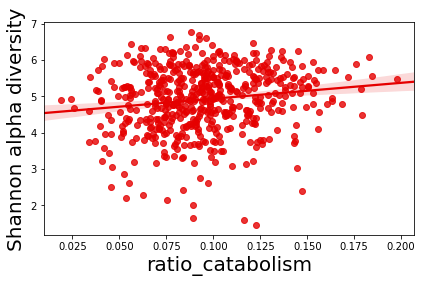

In [29]:
i = 4
col_list_palette = sns.xkcd_palette(['red'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_shannon", label=var[i],data=df)
ax.set_xlabel(var[i], fontsize=20)
ax.set_ylabel('Shannon alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/Shannon_RatioCat_reg.pdf')
ax.savefig('../figures/Shannon_RatioCat_reg.png')

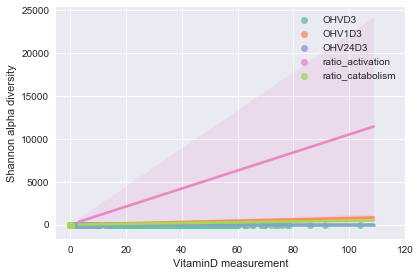

In [30]:
# all 5 VitD measurements 
sns.set(color_codes=True)
var = df.columns.drop('alpha_shannon')
sns.set_palette("Set2", n_colors=len(var))
for i in range(len(var)):
    ax = sns.regplot(x=var[i], y="alpha_shannon", label=var[i], data=df)
ax.set(xlabel='VitaminD measurement', ylabel='Shannon alpha diversity')
ax.legend()
plt.xlim(-5, 120)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/Shannon_5VitD_reg.pdf')
ax.savefig('../figures/Shannon_5VitD_reg.png')

## III. linear regression of PD alpha diversity vs. 5 vitaminD measurements

In [31]:
out = []
for i in range(len(var)):
    tmp = df[['alpha_shannon', var[i]]].dropna(axis=0, how='any')
    y = tmp['alpha_shannon']
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    #print(results.summary())
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
    name = ['t value', 'p value']
    test = sms.linear_harvey_collier(results)
    linear = lzip(name, test)[1][1]

    out.append(['alpha_shannon', var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter, linear])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val', 'linear P-val'])
out

# fine with non-normal residuals
# reference: https://stats.stackexchange.com/questions/29731/regression-when-the-ols-residuals-are-not-normally-distributed

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val,linear P-val
0,alpha_shannon,OHVD3,0.003522,0.246062,0.000627,4.284689e-11,112.280839,0.127203,0.489002
1,alpha_shannon,OHV1D3,7.563663,0.000053,0.026792,5.671851e-13,50.788391,0.897337,0.868035
2,alpha_shannon,OHV24D3,0.060370,0.002854,0.013898,3.146411e-11,8.684601,0.068469,0.760686
3,alpha_shannon,ratio_activation,105.141667,0.040672,0.005749,2.093292e-12,1361.655743,0.146394,0.299349
4,alpha_shannon,ratio_catabolism,4.385633,0.000520,0.019754,1.466280e-11,33.923192,0.168445,0.559495


#### diagnostic results: only break the 'normality' asssumption; all else hold
This is not a concern, see here (https://stats.stackexchange.com/questions/75054/how-do-i-perform-a-regression-on-non-normal-data-which-remain-non-normal-when-tr)

#### Diagnostics Plots and Tests

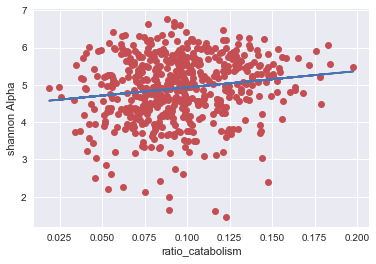

In [32]:
# plot the data and fit
plt.plot(X, y, 'ro')
plt.plot(X, results.fittedvalues, 'b')
plt.xlabel(var[i])
plt.ylabel('shannon Alpha')

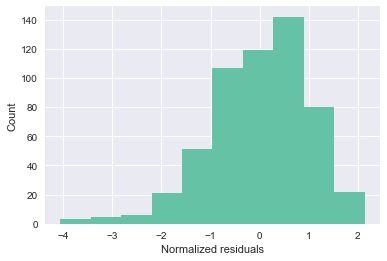

In [33]:
# histogram of normalized residuals
plt.hist(results.resid_pearson)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

In [34]:
# normality of residual tests
# Jarque-Bera test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
print(lzip(name, test))

# Omni test
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
print(lzip(name, test))

[('Jarque-Bera', 64.83719873334232), ('Chi^2 two-tail prob.', 8.3326124648428383e-15), ('Skew', -0.7083670349285603), ('Kurtosis', 3.8897148858955686)]
[('Chi^2', 49.891415093440436), ('Two-tail probability', 1.4662798461578983e-11)]


<Container object of 3 artists>

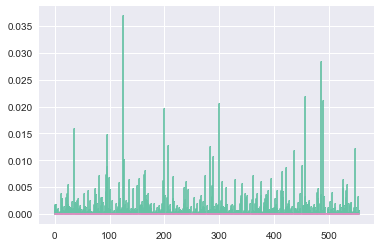

In [35]:
# cooks distance
influence = results.get_influence()
(c, p) = influence.cooks_distance # c is the distance and p is p-value
plt.stem(np.arange(len(c)), c, markerfmt=',')

In [36]:
# influence test
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

array([[ 0.04541307, -0.03508372],
       [-0.00787697, -0.00939814],
       [-0.05109184,  0.04092899],
       [-0.00149383,  0.00099749],
       [-0.00219101,  0.00613303]])

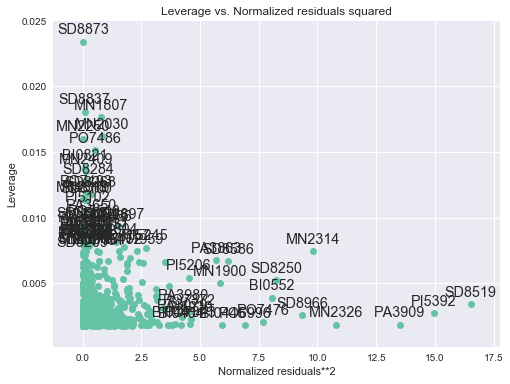

In [37]:
# residuals against leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

In [38]:
# multicolinearity
np.linalg.cond(results.model.exog) # condition number

33.923191966589435

In [39]:
# heteroskedasticity tests (whether residuals have unequal variance)
# Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value'
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
print(lzip(name, test))

# Goldfeld-Quand test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 1.8967268016156811), ('p-valuef-value', 0.1684451521070148), ('f p-value', 1.8963732916244314)]
[('F statistic', 1.1049931979747807), ('p-value', 0.20372091727920719)]


In [40]:
# linearity test
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', 0.58394623101007703), ('p value', 0.559495028649863)]